In [1]:
#Classification
#In this notebook we will try to predict the price of the diamond and our question would be:
#Can we predict the quality of red wine based on the other features?

In [2]:
#fixed acidity - חומציות קבועה
#volatile acidity - חומציות נדיפה
#'citric acid' - חומצת לימון
#'residual sugar' - סוכר שיורי
#'chlorides' - כלורידים
#'free sulfur dioxide' - דו תחמוצת גופרית נקייה
#'total sulfur dioxide' - דו תחמוצת גופרית כללית
#'density' - צפיפות
#'pH' 
#'sulphates' - גופרה
#'alcohol - אחוז אלכוהול
#'quality' - איכות

In [3]:
#import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
#Reading the dataset
wine = pd.read_csv(r"C:\Users\ariki\wine.csv") 

In [5]:
#Shot the first 10 rows of the dataset
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
#Checking if there is null in each column in the dataset
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#look at some sumarry statistics of the dataframe
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
#look at some sumarry statistics of the feature that we will predict
wine['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

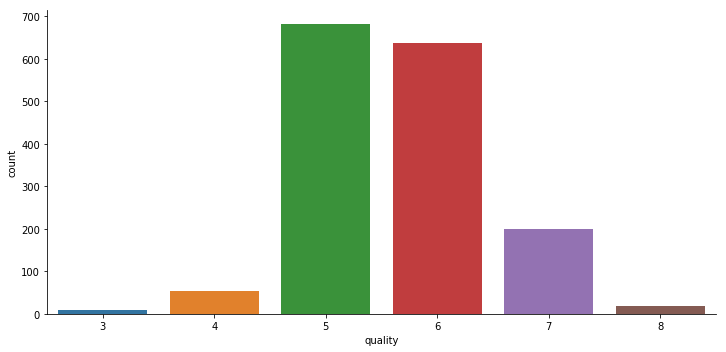

In [9]:
#A graph that counts for every quality how much wine there is
sns.catplot(x='quality', data=wine, kind = 'count' ,aspect=2 )

In [10]:
#Numbers of wines with residual sugar less than 1 gram(rare wines)
len(wine[(wine['residual sugar']<1)])

2

In [11]:
#look at some sumarry statistics of the feature 'volatile acidity'
wine['volatile acidity'].describe()

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

In [12]:
#Amount of wines that has a vinegar taste
len(wine[(wine['volatile acidity']>1)])

21

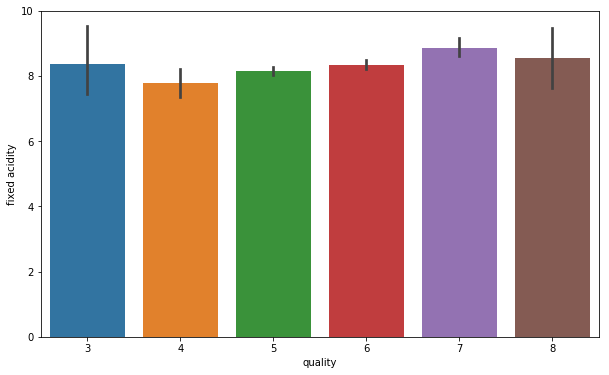

In [13]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

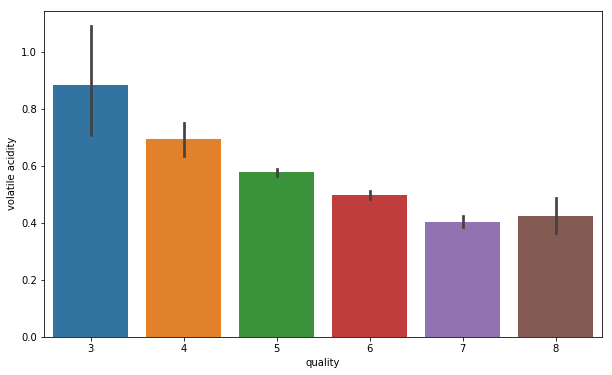

In [14]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

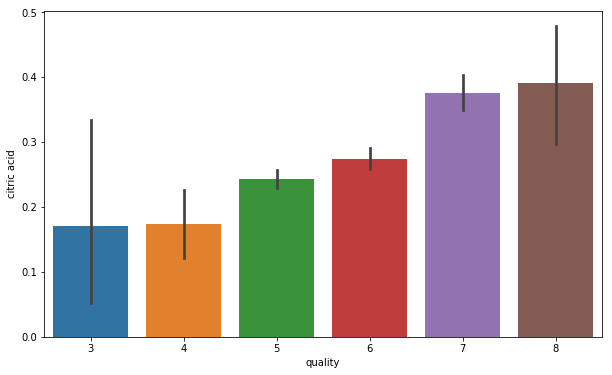

In [15]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

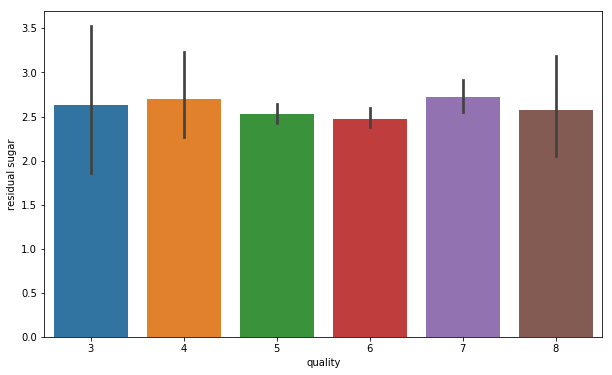

In [16]:
#Here we see that residual sugar does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

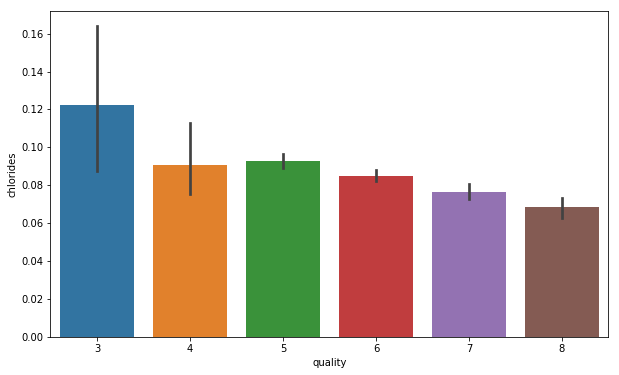

In [17]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

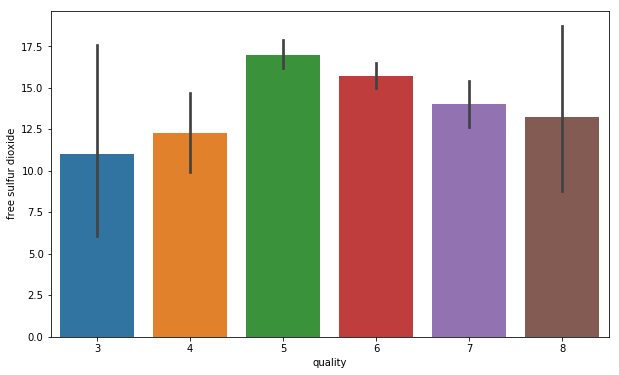

In [18]:
#Here we see that residual sugar does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

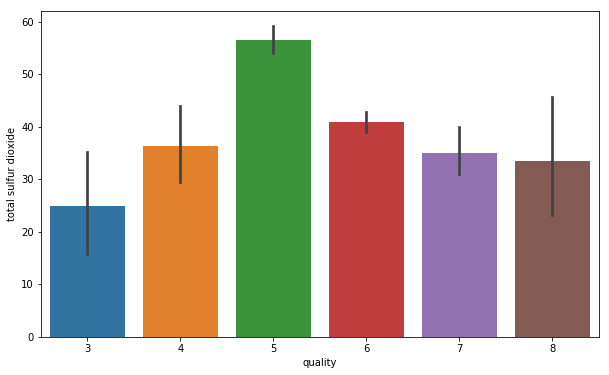

In [19]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

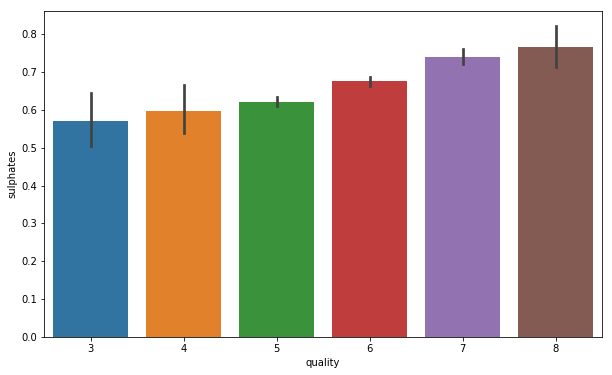

In [20]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

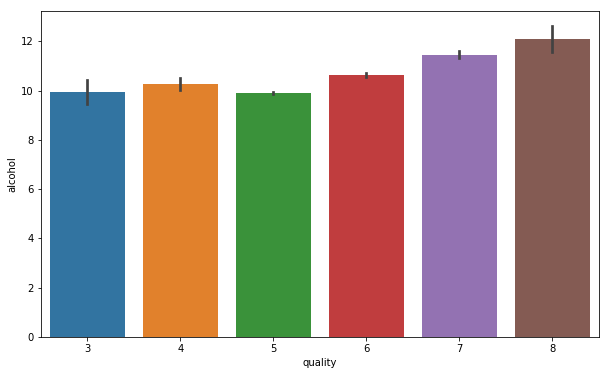

In [21]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [22]:
#Create array and enter it string values 'how_much' times
how_much = wine['quality'].values
temporary = []
for num in how_much:
    if num>6:
        temporary.append('high')
    elif num<5:
        temporary.append('low')
    elif num==5 or num==6:
        temporary.append('medium')

In [23]:
#Convert the array to dataframe, then concat between both datasets and drop and numerical quality column.
temporary = pd.DataFrame(data=temporary, columns=['temporary'])
wine = pd.concat([wine,temporary],axis=1)
wine.drop(columns = 'quality' , axis = 1 , inplace = True)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,temporary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium


In [24]:
#Rename back the column to 'quality'
wine = wine.rename(index=str,columns = {'temporary' : 'quality'})
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium


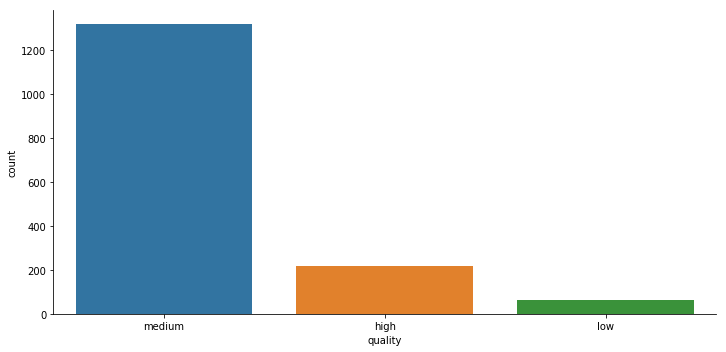

In [25]:
#A graph that counts for every quality how much wine there is
sns.catplot(x='quality', data=wine, kind = 'count' ,aspect=2 )

In [26]:
#As we can't feed String data for Modelling, we will change the columns - 'quality' to num values
wine_quality = {'low':1,
                  'medium':2,
                  'high':3}
wine.quality = wine.quality.map(wine_quality);

In [27]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [28]:
#Now seperate the dataset as response variable and feature variabes
feature = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
X = wine[feature]
y = wine['quality']
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 62)

In [29]:
#Logistic Regression

# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# instantiate the model
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train , y_train)

# store the predicted response values
y_pred = logreg.predict(X_test)

# compute classification accuracy for the logistic regression model
accuracy = accuracy_score(y_test, y_pred)
print('%',(accuracy *100))

% 86.17424242424242


c:\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [30]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200) #create the model, The number of trees in the forest.

#Enter the data training to the model, build a forest of trees from the training set.
rfc.fit(X_train, y_train)

#Predict class for X.
pred_rfc = rfc.predict(X_test)
print(pred_rfc)

#Accuracy percentages
accuracy =  rfc.score(X_test, y_test)

print('% Random forest classifier accuracy:', accuracy*100)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3
 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2
 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 2 3 2 2 2 2 3 2 2 

In [31]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

#create the model
knn = KNeighborsClassifier(n_neighbors=1)

#Enter the data training to the mode
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8049242424242424


In [32]:
# using cross validation to get the best percentage of success

k_range = list(range(1, 61))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance',p=1)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.814079038497454, 0.814079038497454, 0.8308854585804835, 0.8402149210955969, 0.8476837149716957, 0.847735967093102, 0.8383978555584376, 0.8505831407451027, 0.8496831798529312, 0.8534130073704507, 0.8505917942584291, 0.8533698940901042, 0.8542961420699277, 0.8533702161440017, 0.8561566474351059, 0.851474770177845, 0.8505401907385928, 0.8515008939916606, 0.8505749680657347, 0.8487231162138829, 0.8487578980348003, 0.8450192537301181, 0.8478060070751197, 0.8496580177070326, 0.8496580177070326, 0.8487320917811066, 0.8468541161154393, 0.847780042041365, 0.8459281901895134, 0.8468627696287656, 0.8450022642635874, 0.8450109177769137, 0.8422155109185858, 0.8440760162837642, 0.8459453384361051, 0.8459365216489424, 0.8450105957230164, 0.845002100989751, 0.8449934474764245, 0.8449934474764245, 0.8450022642635873, 0.8440588680371721, 0.8431414368445118, 0.8431414368445118, 0.8431414368445118, 0.8440848330709269, 0.8431414368445118, 0.8421980406180968, 0.8421980406180968, 0.8412546443916817, 0.842

Text(0, 0.5, 'Cross validation Accuracy')

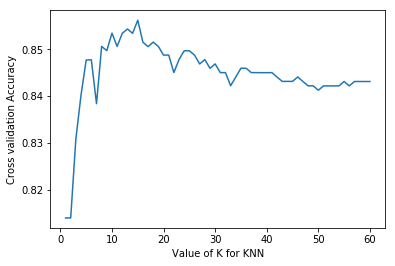

In [33]:
# graph of the value of k (x) and the cross validation accuracy 
plt.plot(k_range, k_scores)
#names of x and y
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross validation Accuracy')

In [34]:
# showing the new precentage with the best n_neighbors
nn = KNeighborsClassifier(n_neighbors=17,weights='distance',p=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('% knn accuracy:', accuracy*100)

% knn accuracy: 87.31060606060606
